# Model Performance Transformations

Lets practice some basic data transformation for ML performance enhancement

In [1]:
# Imports

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
# Categorical data analyser

def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

## Scaling

Some ML algorithms have problems performing well whenever the data scale differ greatly between features. In those cases scaling the data is your best option.

- [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Try both options and see what happens with performance (i.e.: AUC).

<img src="../images/scaling.png" alt="Drawing" style="width: 500px;"/>

In [3]:
# Weather dataset (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

weather = pd.read_csv('../data/weatherAUS.csv')
print(weather.shape)
weather.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Uluru weather (numerical features)

weather = weather[weather['Location'].isin(['Uluru'])].reset_index(drop=True)
weather = weather[weather['RainToday'].isin(['No','Yes'])].reset_index(drop=True)
weather = weather[weather['RainTomorrow'].isin(['No','Yes'])]
weather = weather[['MinTemp',
                   'MaxTemp',
                   'Rainfall',
                   'WindSpeed9am',
                   'WindSpeed3pm',
                   'Humidity9am',
                   'Humidity3pm',
                   'Pressure9am',
                   'Pressure3pm',
                   'Temp9am',
                   'Temp3pm',
                   'RainTomorrow']]
weather = weather.dropna().reset_index(drop=True)
col_weather = list(weather.columns)
print(col_weather)
print(weather.shape)
print(weather.describe())
weather.head()

['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']
(1479, 12)
           MinTemp      MaxTemp     Rainfall  WindSpeed9am  WindSpeed3pm  \
count  1479.000000  1479.000000  1479.000000   1479.000000   1479.000000   
mean     14.368627    30.402299     0.716700     17.613928     17.050710   
std       7.432857     7.624058     4.208585      7.887082      6.893016   
min      -1.900000    11.300000     0.000000      0.000000      0.000000   
25%       8.100000    23.800000     0.000000     11.000000     11.000000   
50%      14.900000    31.200000     0.000000     17.000000     17.000000   
75%      20.800000    37.100000     0.000000     24.000000     22.000000   
max      31.000000    44.400000    83.800000     41.000000     48.000000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm      Temp9am  \
count  1479.000000  1479.000000  1479.000000  1479.000000  1479.0

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,19.7,30.0,0.8,30.0,24.0,76.0,54.0,1010.6,1007.5,21.7,28.4,No
1,21.6,33.1,0.0,22.0,11.0,44.0,33.0,1010.5,1006.5,24.6,31.3,No
2,21.3,36.1,0.0,24.0,13.0,39.0,27.0,1006.9,1002.7,27.6,34.5,No
3,22.9,37.7,0.0,28.0,13.0,35.0,22.0,1006.0,1002.1,28.7,35.4,No
4,24.0,39.0,0.0,20.0,19.0,33.0,21.0,1006.9,1003.5,29.9,37.3,No


In [5]:
# Features + target

X = weather[['MinTemp',
          'MaxTemp',
          'Rainfall',
          'WindSpeed9am',
          'WindSpeed3pm',
          'Humidity9am',
          'Humidity3pm',
          'Pressure9am',
          'Pressure3pm',
          'Temp9am',
          'Temp3pm']]
y = pd.get_dummies(weather['RainTomorrow'], drop_first=True)['Yes']
print(X.shape,y.shape)

(1479, 11) (1479,)


In [6]:
# Train + test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (1183, 11), X_test: (296, 11), y_train: (1183,), y_test: (296,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [7]:
# Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [8]:
print(type(scaled_data))
scaled_data

<class 'numpy.ndarray'>


array([[ 0.71751357, -0.05278487,  0.01979946, ..., -0.90039756,
         0.09167267, -0.09181875],
       [ 0.97322179,  0.35396027, -0.17035247, ..., -1.05506695,
         0.4660711 ,  0.30207985],
       [ 0.93284681,  0.7475846 , -0.17035247, ..., -1.64281064,
         0.85337982,  0.73672658],
       ...,
       [-1.44927714, -0.66946299, -0.17035247, ...,  0.89376738,
        -1.30263873, -0.62154446],
       [-1.20702724, -0.45953001, -0.17035247, ...,  0.53802778,
        -1.09607408, -0.40422109],
       [-0.88402739, -0.4464092 , -0.17035247, ...,  0.49162696,
        -0.76040652, -0.4178038 ]])

In [9]:
# Once we modified X, we need to build train/test sets again:

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [10]:
# Linear model

linear_model = LogisticRegression(max_iter=1000)
linear_param = linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_auc = roc_auc_score(y_test, linear_pred)
print(f"Linear model AUC is: {linear_auc}")

Linear model AUC is: 0.6787953638609159


In [11]:
# Ensemble model

ensemble_model = RandomForestClassifier()
ensemble_param = ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)
print(f"Linear model AUC is: {ensemble_auc}")

Linear model AUC is: 0.6661599847995441


In [12]:
'''
Before Scaling:

Linear model AUC = 0.72
Ensemble model AUC = 0.66

After Scaling:

Linear model AUC = 0.67
Ensemble model AUC = 0.66


In this case, scaling improves Roc Curve for Linear model but not so for Ensemble model. We need to consider
also other criteria like precisión and recall
'''

'\nBefore Scaling:\n\nLinear model AUC = 0.72\nEnsemble model AUC = 0.66\n\nAfter Scaling:\n\nLinear model AUC = 0.67\nEnsemble model AUC = 0.66\n\n\nIn this case, scaling improves Roc Curve for Linear model but not so for Ensemble model. We need to consider\nalso other criteria like precisión and recall\n'

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y_test, ensemble_pred)

array([[267,  10],
       [ 12,   7]])

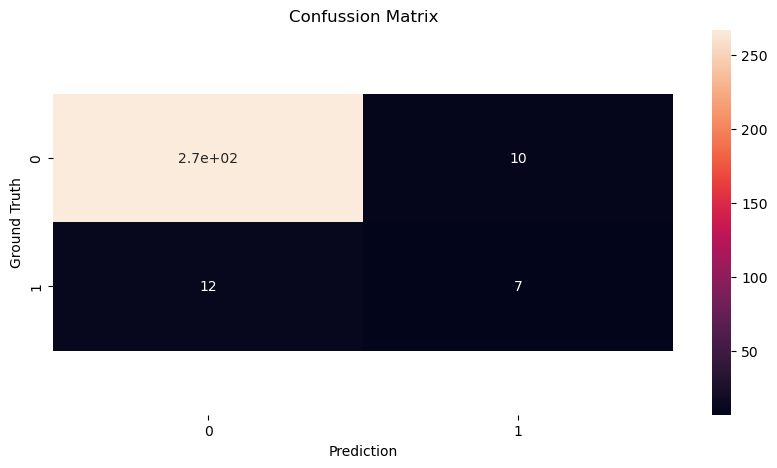

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
ax = sns.heatmap(confusion_matrix(y_test, ensemble_pred), annot=True)
b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)
plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [17]:
print(f'accuracy score: {accuracy_score(y_test, ensemble_pred)}')
print(f'precision score: {precision_score(y_test, ensemble_pred)}')
print(f'recall score: {recall_score(y_test, ensemble_pred)}')
print(f'f1 score: {f1_score(y_test, ensemble_pred)}')

accuracy score: 0.9256756756756757
precision score: 0.4117647058823529
recall score: 0.3684210526315789
f1 score: 0.3888888888888889


In [18]:
print(f'accuracy score: {accuracy_score(y_test, linear_pred)}')
print(f'precision score: {precision_score(y_test, linear_pred)}')
print(f'recall score: {recall_score(y_test, linear_pred)}')
print(f'f1 score: {f1_score(y_test, linear_pred)}')

accuracy score: 0.9493243243243243
precision score: 0.7
recall score: 0.3684210526315789
f1 score: 0.4827586206896552


In [19]:
'''
Conclusion: The accuracy is a bit higher with linear model. However, in both cases f1 score is low.
This means that we need to use other techniques to improve the model.
'''

'\nConclusion: The accuracy is a bit higher with linear model. However, in both cases f1 score is low.\nThis means that we need to use other techniques to improve the model.\n'

---

## Enconding

ML algorithms do not support categorical data. Therefore you need to find a way to transform categorical data into numerical. You must compare the results using both techniques: __One Hot Encoding__ or __Label Encoding__

- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

<img src="../images/encoding.png" alt="Drawing" style="width: 500px;"/>

In [46]:
# Mushrooms dataset (https://www.kaggle.com/uciml/mushroom-classification)

mushrooms = pd.read_csv('../data/mushrooms.csv')
col_mushrooms = list(mushrooms.columns)
print(mushrooms.shape)
mushrooms.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [47]:
# Features analysis

cat_mushrooms = cat_var(mushrooms, col_mushrooms)
cat_mushrooms

,categorical_variable,number_of_possible_values,values
0,gill-color,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"
1,cap-color,10,"[n, y, w, g, e, p, b, u, c, r]"
2,odor,9,"[p, a, l, n, f, c, y, s, m]"
3,stalk-color-below-ring,9,"[w, p, g, b, n, e, y, o, c]"
4,spore-print-color,9,"[k, n, u, h, w, r, o, y, b]"
5,stalk-color-above-ring,9,"[w, g, p, n, b, e, o, c, y]"
6,habitat,7,"[u, g, m, d, p, w, l]"
7,cap-shape,6,"[x, b, s, f, k, c]"
8,population,6,"[s, n, a, v, y, c]"
9,stalk-root,5,"[e, c, b, r, ?]"


In [ ]:
# We can delet feature veil-type as it only has one possible value

In [68]:
# Features + target (encoding). IMPORTANT: you may pick any of the 2-labeled features as you target (choose wisely!!!)

# 1. LABEL ENCODING

mushrooms_label_encoding = mushrooms.drop(['class', 'veil-type'], axis=1).apply(lambda col: col.map(lambda x: ord(x) - 96))
mushrooms_label_encoding['class'] = mushrooms['class'].map({'p': 0, 'e': 1})
mushrooms_label_encoding

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,24,19,14,20,16,6,3,14,11,5,...,19,23,23,23,15,16,11,19,21,0
1,24,19,25,20,1,6,3,2,11,5,...,19,23,23,23,15,16,14,14,7,1
2,2,19,23,20,12,6,3,2,14,5,...,19,23,23,23,15,16,14,14,13,1
3,24,25,23,20,16,6,3,14,14,5,...,19,23,23,23,15,16,11,19,21,0
4,24,19,7,6,14,6,23,2,11,20,...,19,23,23,23,15,5,14,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,11,19,14,6,14,1,3,2,25,5,...,19,15,15,15,15,16,2,3,12,1
8120,24,19,14,6,14,1,3,2,25,5,...,19,15,15,14,15,16,2,22,12,1
8121,6,19,14,6,14,1,3,2,14,5,...,19,15,15,15,15,16,2,3,12,1
8122,11,25,14,6,25,6,3,14,2,20,...,11,23,23,23,15,5,23,22,12,0


In [69]:
# Train + test

y = mushrooms_label_encoding[['class']]
X = mushrooms_label_encoding[[col for col in mushrooms_label_encoding.columns if col != 'class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
# Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.07774273,  0.16938584,  0.12010595, ..., -0.65193203,
        -0.1598263 ,  2.20918348],
       [ 1.07774273,  0.16938584,  1.5976869 , ..., -0.14070656,
        -0.96730694, -0.33531051],
       [-1.40169814,  0.16938584,  1.32903582, ..., -0.14070656,
        -0.96730694,  0.75518692],
       ...,
       [-0.95089071,  0.16938584,  0.12010595, ..., -2.18560841,
        -2.74376435,  0.57343735],
       [-0.38738142,  0.93786532,  0.12010595, ...,  1.39296982,
         0.32466208,  0.57343735],
       [ 1.07774273,  0.16938584,  0.12010595, ...,  0.02970192,
        -2.74376435,  0.57343735]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [72]:
# Linear model

linear_model = LogisticRegression(max_iter=1000)
linear_param = linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_auc = roc_auc_score(y_test, linear_pred)
print(f"Linear model AUC is: {linear_auc}")

Linear model AUC is: 0.9529417832427727


C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
# Ensemble model

ensemble_model = RandomForestClassifier()
ensemble_param = ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)
print(f"Linear model AUC is: {ensemble_auc}")

C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear model AUC is: 1.0


In [74]:
'''
It seems that RandomForestClassifier is over-fitting.
'''

'\nIt seems that RandomForestClassifier is over-fitting.\n'

In [75]:
print(f'accuracy score: {accuracy_score(y_test, ensemble_pred)}')
print(f'precision score: {precision_score(y_test, ensemble_pred)}')
print(f'recall score: {recall_score(y_test, ensemble_pred)}')
print(f'f1 score: {f1_score(y_test, ensemble_pred)}')

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0


In [76]:
'''
Same conclusion based on other performance indicators.
Lets try with dimensionality reduction to see how it changes model prediction.
'''

'\nSame conclusion based on other performance indicators.\nLets try with dimensionality reduction to see how it changes model prediction.\n'

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA().fit(X_scaled)

In [79]:
pca.explained_variance_ratio_

array([0.20496026, 0.12012074, 0.11220638, 0.10597927, 0.07786035,
       0.06493212, 0.04717892, 0.04337832, 0.0372167 , 0.03209248,
       0.02763615, 0.02543049, 0.02354837, 0.02114176, 0.01716707,
       0.01485689, 0.00953516, 0.00581773, 0.0044342 , 0.00268034,
       0.00182628])

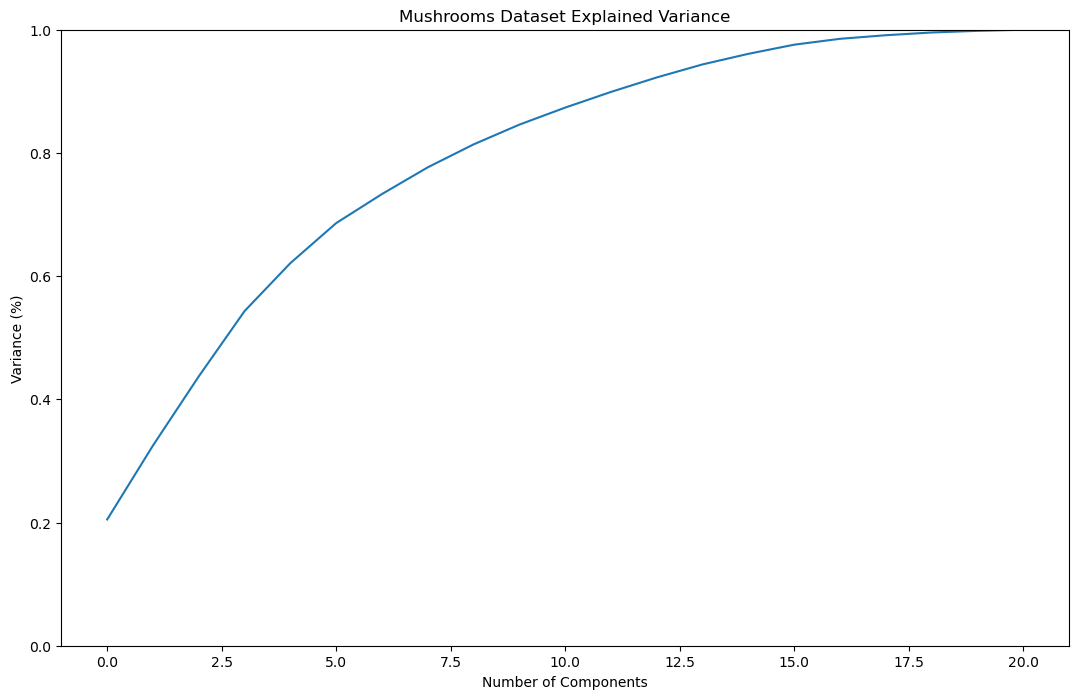

In [80]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(13,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.ylim([0,1])
plt.title('Mushrooms Dataset Explained Variance')
plt.show()

In [81]:
pca_optimum = PCA(n_components=13) # with 13 dimensions we explain +90% of Variance
X_scaled_pca_optimum = pca_optimum.fit_transform(X_scaled)
pd.DataFrame(X_scaled_pca_optimum)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.454761,1.393309,0.388090,0.204161,-1.933775,-1.127312,1.120138,0.867119,1.679543,0.556129,0.641043,-0.501762,-0.208655
1,2.063658,0.554869,-0.076138,1.186739,-1.622490,-1.363590,0.833952,0.219155,-0.627250,0.322604,-0.740168,0.880145,0.239809
2,1.505083,1.348558,-0.278914,1.072650,-1.503106,-0.552050,-1.495373,0.166566,0.343545,0.863984,0.249841,0.070634,0.063623
3,0.660781,1.495580,0.205640,0.400716,-2.514391,-1.579526,0.897981,0.968582,0.780133,0.833646,1.132960,-0.678833,-0.211706
4,-0.841855,0.314124,-0.077046,2.871292,2.007821,-0.326532,0.652121,2.129529,-0.587469,0.707009,-1.301104,0.806335,-0.338073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.670442,2.881204,-8.138767,-1.791567,2.760048,-1.981112,-0.141071,0.938647,0.375776,-0.103428,0.209025,0.205254,-0.136753
8120,1.910541,2.633671,-7.565715,-3.116925,2.626955,-2.630786,1.393050,-0.104910,0.518613,-1.197185,1.113252,-0.423587,-0.011891
8121,1.123741,2.632914,-8.143260,-1.979056,2.522288,-2.068572,-0.696179,0.765915,0.481066,0.061188,0.009080,0.565484,0.039582
8122,-3.960796,0.772872,0.652367,-0.514795,-0.238792,-0.644831,-0.487335,-0.044085,-0.092506,0.198600,1.622448,0.422606,-0.218296


In [82]:
# Now lets do supervised training based on this data:

X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca_optimum, y, test_size = 0.2, random_state = 42)

In [83]:
# Ensemble model

ensemble_model = RandomForestClassifier()
ensemble_param = ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)
print(f"Linear model AUC is: {ensemble_auc}")

C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear model AUC is: 1.0


In [84]:
# The model is still overfitting. Lets see how the variables are correlated

In [85]:
mushrooms_label_encoding.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.048149,-0.005568,-0.006983,-0.061453,0.063103,0.023312,0.018421,0.019578,0.008100,...,-0.008918,-0.008351,-0.006735,0.062916,-0.081545,0.030445,-0.082280,0.032433,-0.044782,-0.013877
cap-surface,-0.048149,1.000000,0.009685,0.067589,0.076905,-0.038322,-0.279372,0.211024,-0.167157,-0.012280,...,0.094183,0.054762,0.057686,-0.024844,-0.011742,-0.124144,0.225909,0.021237,0.172467,-0.179558
cap-color,-0.005568,0.009685,1.000000,0.004651,-0.283445,-0.007061,0.132869,-0.111117,0.078669,-0.412467,...,-0.019982,0.113321,0.116622,-0.016198,-0.012487,0.148149,-0.221267,-0.113398,0.041234,0.038469
bruises,-0.006983,0.067589,0.004651,1.000000,-0.053415,0.137359,-0.299473,-0.369596,0.547180,0.099364,...,0.495784,0.054388,0.063216,0.129493,0.047317,0.653071,-0.248381,0.080469,-0.085181,0.501530
odor,-0.061453,0.076905,-0.283445,-0.053415,1.000000,-0.050749,0.042856,0.320905,-0.157872,0.439594,...,0.101077,0.117887,0.114487,-0.050063,0.091322,-0.331930,0.488106,-0.065238,0.012020,0.088603
gill-attachment,0.063103,-0.038322,-0.007061,0.137359,-0.050749,1.000000,0.071489,0.108984,-0.138857,0.186485,...,-0.120610,0.106378,0.104684,0.952313,0.056000,-0.141086,0.001507,0.218453,-0.073109,-0.129200
gill-spacing,0.023312,-0.279372,0.132869,-0.299473,0.042856,0.071489,1.000000,-0.108333,0.105130,0.080895,...,-0.171500,0.333312,0.315356,0.071527,0.245353,-0.216351,0.064109,-0.465139,-0.162719,0.348387
gill-size,0.018421,0.211024,-0.111117,-0.369596,0.320905,0.108984,-0.108333,1.000000,-0.529465,0.214576,...,-0.001326,0.255845,0.240231,0.106033,-0.186245,-0.496474,0.616063,0.184522,0.196221,-0.540024
gill-color,0.019578,-0.167157,0.078669,0.547180,-0.157872,-0.138857,0.105130,-0.529465,1.000000,-0.184856,...,0.306453,-0.029929,-0.045249,-0.118895,0.122835,0.635853,-0.403413,-0.073192,-0.211227,0.558974
stalk-shape,0.008100,-0.012280,-0.412467,0.099364,0.439594,0.186485,0.080895,0.214576,-0.184856,1.000000,...,0.007105,0.118291,0.130280,0.175805,-0.318688,-0.344922,0.279891,0.088575,-0.253823,0.102019


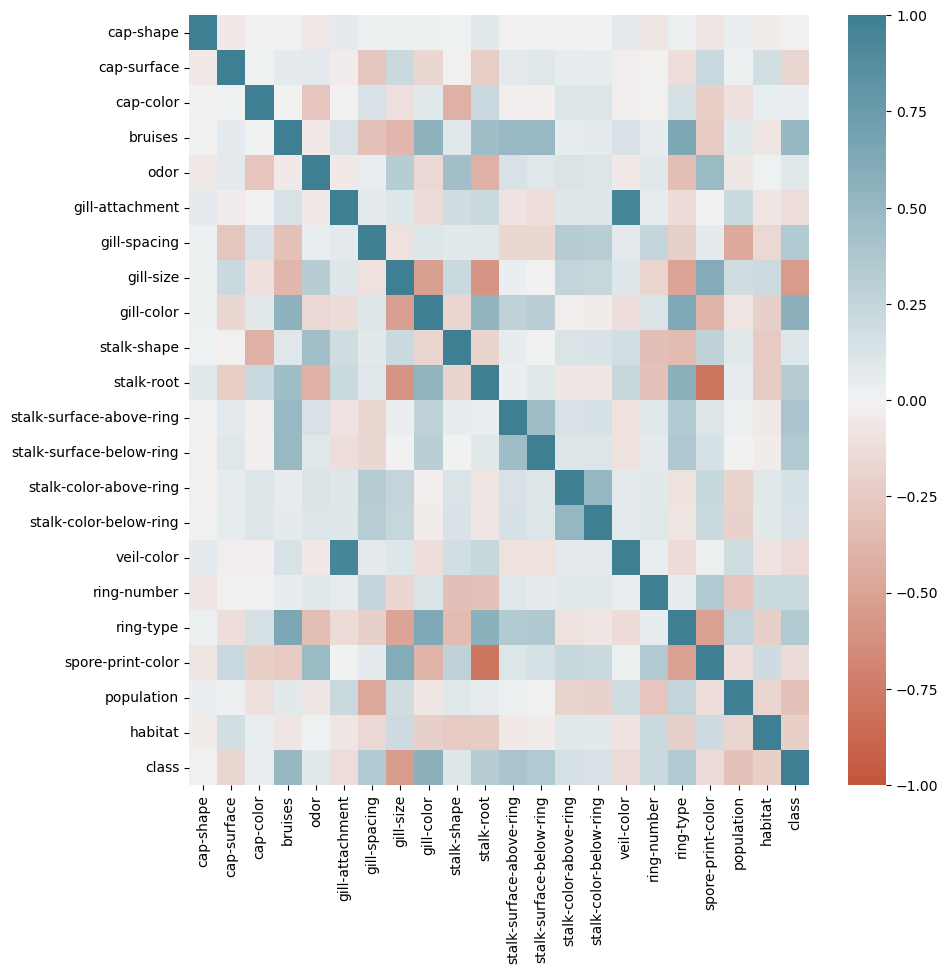

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mushrooms_label_encoding.corr(),
                vmin = -1,
                vmax = 1,
                cmap = sns.diverging_palette(20,220,as_cmap=True),
                ax = ax)

In [ ]:
'''
INSIGHTS: there are some features that explain +50% of class (e.g. bruises, gill-size, gill-color).
This might be the reason why the model is so precise.
'''

In [32]:
# 1. ONE HOT ENCODING

mushrooms_features = mushrooms.drop('class', axis=1)
mushrooms_onehot_encoding = pd.get_dummies(mushrooms_features, drop_first=True, dtype=int)
mushrooms_onehot_encoding['class'] = mushrooms['class'].map({'p': 0, 'e': 1})
mushrooms_onehot_encoding

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8120,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8122,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [33]:
# Train + test

y = mushrooms_onehot_encoding[['class']]
X = mushrooms_onehot_encoding[[col for col in mushrooms_onehot_encoding.columns if col != 'class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
# Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.02219484,  1.2559503 , -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985,  2.96843295, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [36]:
# Linear model

linear_model = LogisticRegression(max_iter=1000)
linear_param = linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_auc = roc_auc_score(y_test, linear_pred)
print(f"Linear model AUC is: {linear_auc}")

Linear model AUC is: 1.0


C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# Ensemble model

ensemble_model = RandomForestClassifier()
ensemble_param = ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)
print(f"Linear model AUC is: {ensemble_auc}")

C:\Users\Kristina\miniconda3\envs\sklearn_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear model AUC is: 1.0


In [38]:
'''
With one hot encoding, both, Linear and RandomForestClassifier are over-fitting.
'''

'\nWith one hot encoding, both, Linear and RandomForestClassifier are over-fitting.\n'

---

## Bonus

Now that you can grasp the potential of pre-processing your data...what would you do about the following dataset?

<img src="../images/bonus.jpg" alt="Drawing" style="width: 500px;"/>

In [39]:
# Netflix dataset (https://www.kaggle.com/shivamb/netflix-shows)

netflix = pd.read_csv('../data/netflix_titles.csv')
col_netflix = list(netflix.columns)
print(netflix.shape)
netflix.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [40]:
# ML workflow -> ¿what would you do?










---